In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sys.path.append('..')
from libs.constants import * 

In [3]:
sample_freq = 200e3

bat_ids = ['bat290', 'bat294', 'bat296', 'bat298']
path = raw_sound_190526_path / bat_ids[0]

In [4]:
arr = np.fromfile(str(path /'no1.bin'), dtype=np.int16)
print(arr.shape)

(480000000,)


In [5]:
tracks = arr.reshape(int(arr.shape[0]/32), 32)[:, :16].T
print(tracks.shape)

(16, 15000000)


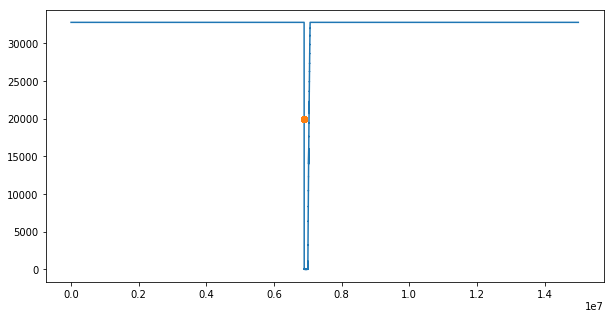

In [11]:
fly_start_sec = -2.
fly_end_sec = -1.1

trigger_ind = np.where(tracks[0, :]<30000)[0][0]
trigger_sec = trigger_ind / sample_freq

mov_start_ind = trigger_ind - 6 * sample_freq 
mov_end_ind = trigger_ind

fly_start_ind = mov_end_ind + 2 * sample_freq
fly_end_ind = mov_end_ind + 1.1 * sample_freq

plt.figure(figsize=(10, 5))
plt.plot(tracks[0, :])
plt.plot(range(trigger_ind, trigger_ind+1000), 20000*np.ones(1000), 'o')
plt.show()

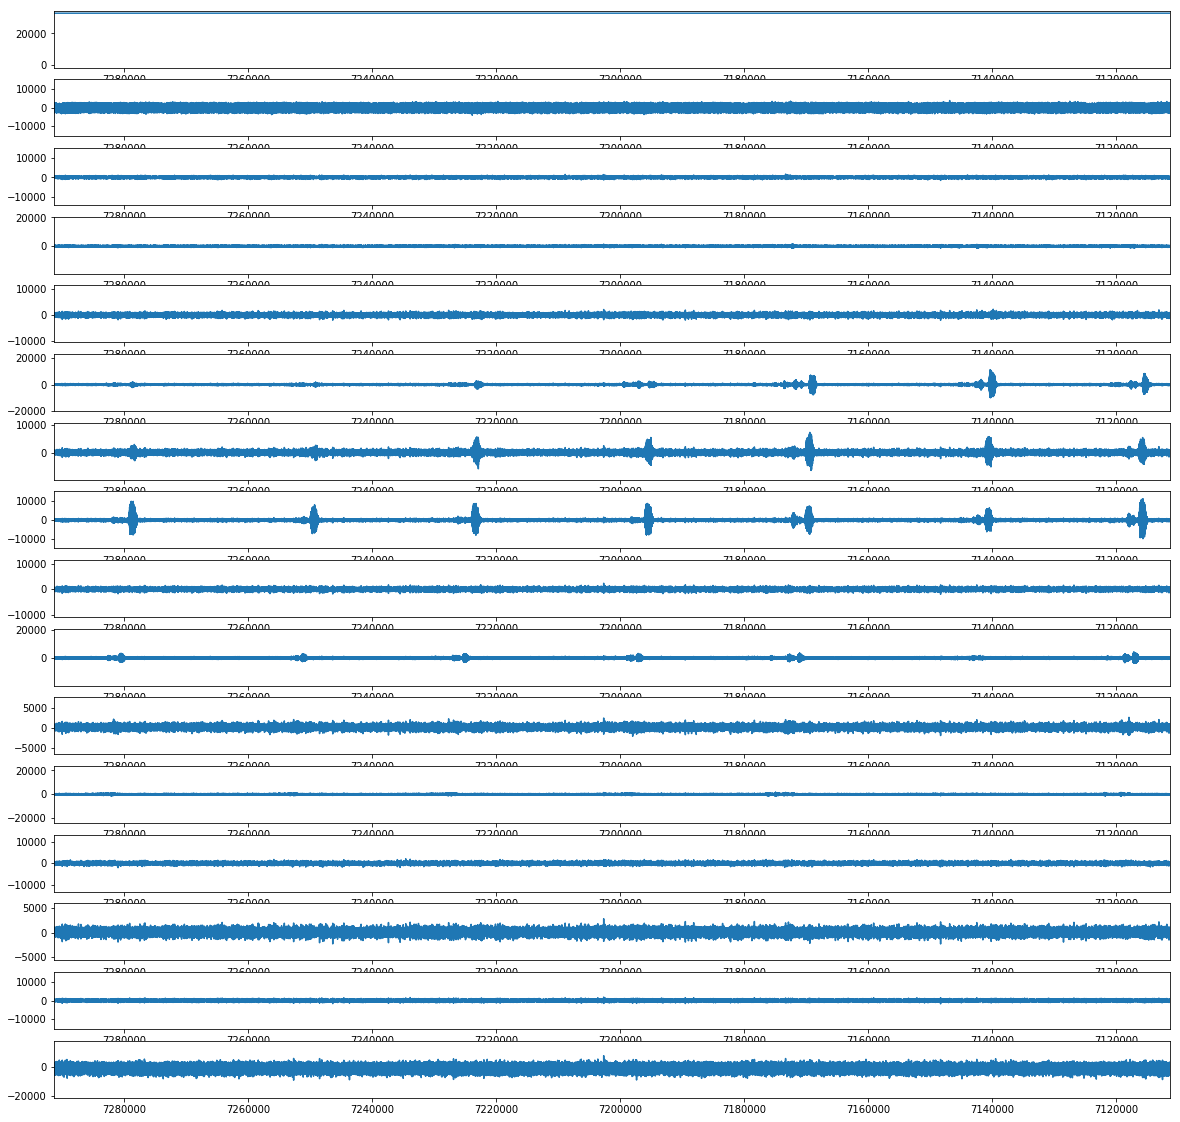

In [12]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(16, 1, i+1)
    plt.plot(tracks[i, :])
    
    plt.xlim([fly_start_ind, fly_end_ind])
    
plt.show()

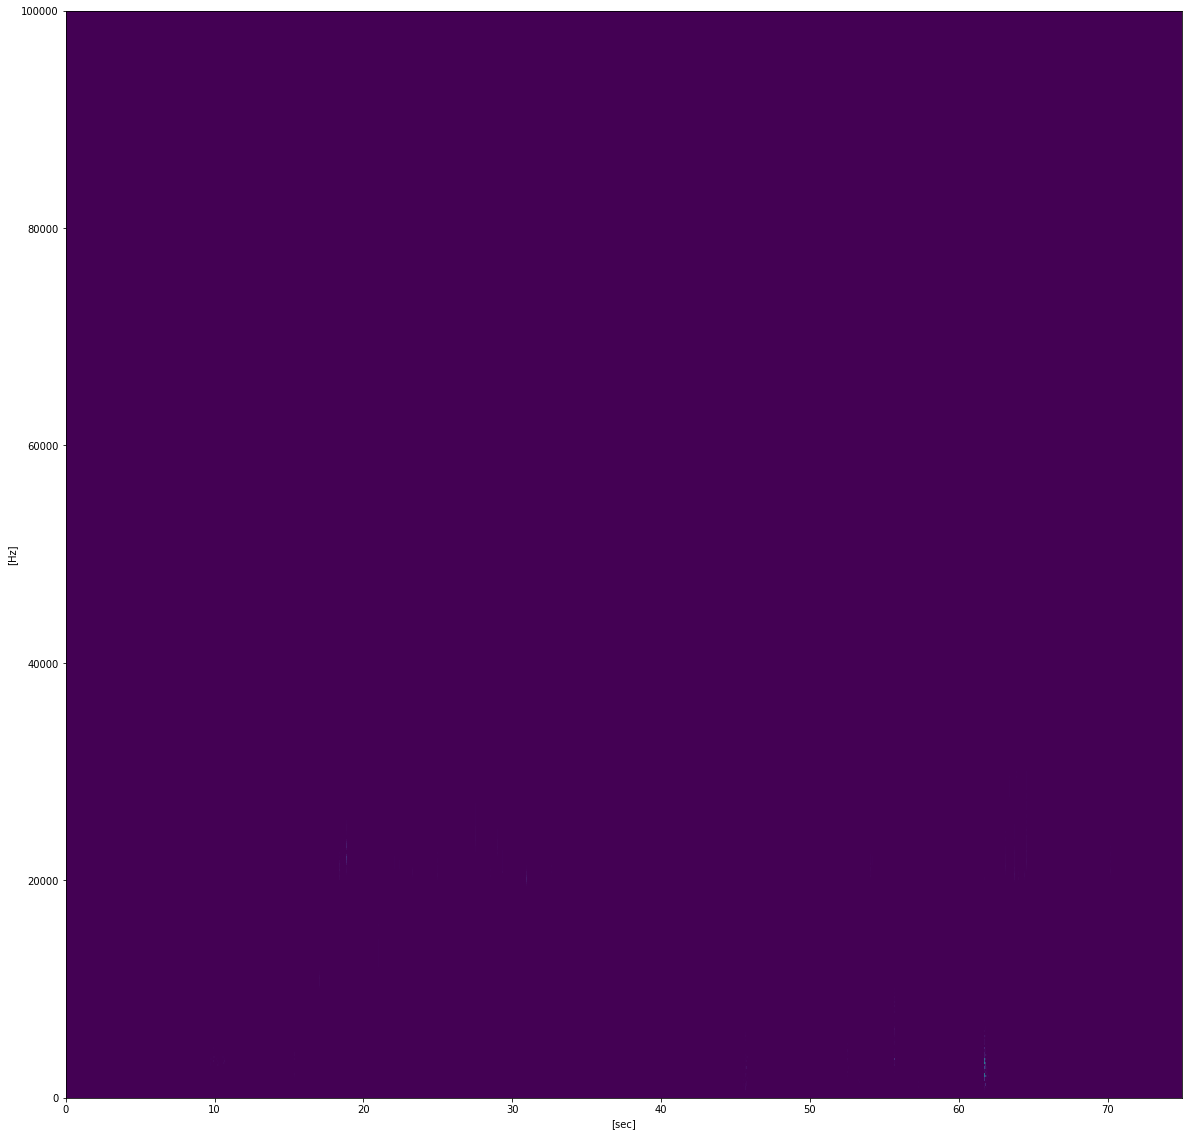

In [49]:
f1 = 1
f1 = 20000
f, t, Sxx = signal.spectrogram(tracks[2, :], sample_freq, nperseg=2**10)

plt.figure(figsize=(20, 20))
plt.pcolormesh(t, f, Sxx)
# plt.xlim([7.25, 7.5])
# plt.ylim([0, 20000])
plt.xlabel('[sec]')
plt.ylabel('[Hz]')
plt.show()

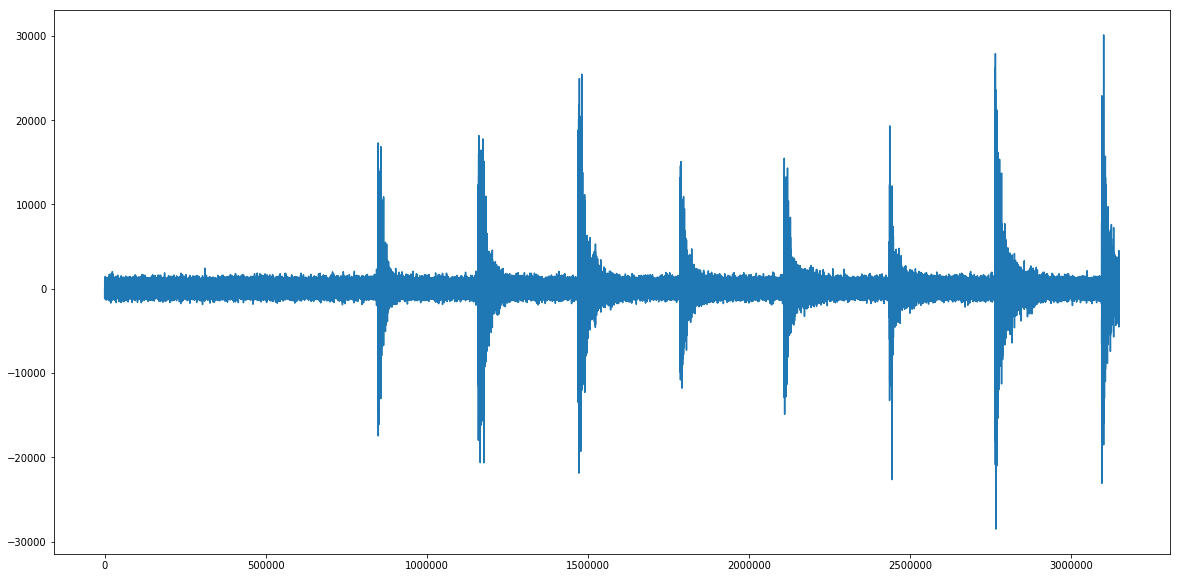

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(mat[:, 8])

In [1]:
plt.figure(figsize=(20, 10))
plt.plot(mat[:, 12])

NameError: name 'plt' is not defined

[780791.            +0.j         -39710.13215138+36846.54502992j
 -34863.41033107+31605.11079837j ...  16812.59509058-39043.30613861j
 -34863.41033107-31605.11079837j -39710.13215138-36846.54502992j]


/home/lee/.pyenv/versions/3.7.0/envs/jupyter_bat/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


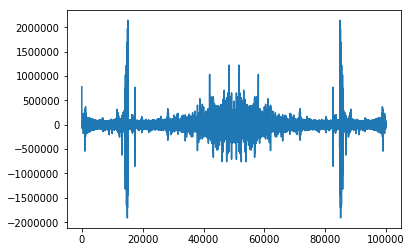

In [32]:
sp = np.fft.fft(mat[:100000, 1])
freq = np.fft.fftfreq(2**4)
plt.plot(sp)
print(sp)

In [33]:
def get_freq_time(signal, stride=2**12):
    freq_time = []  
    for i in range(len(signal)-stride):
        sp = np.fft.fft(signal[i:i+stride])
        freq_time.append(sp.real)
    return np.array(freq_time)

In [34]:
ft = get_freq_time(mat[:100000, 2])

In [35]:
ft.shape

(95904, 4096)

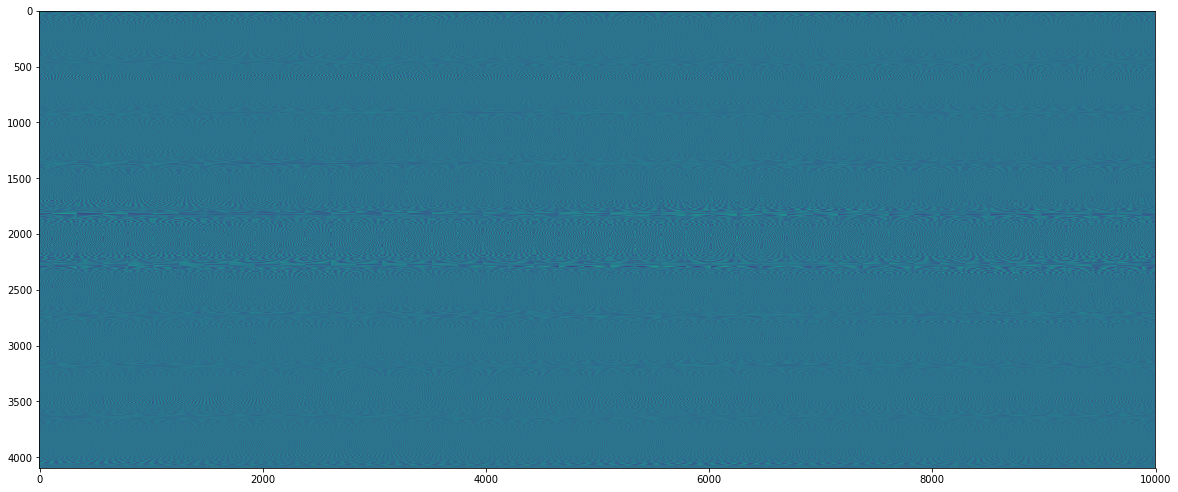

In [36]:
plt.figure(figsize=(20, 20))
plt.imshow(ft[:10000, :].T)

In [21]:
5e-06*(2**12)

0.02048